In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car.data")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.shape

(1727, 7)

In [6]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

In [7]:
df.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
Class       4
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [9]:
df.buying = enc.fit_transform(df.buying)
df.maint = enc.fit_transform(df.maint)
df.lug_boot = enc.fit_transform(df.lug_boot)
df.safety = enc.fit_transform(df.safety)
df.doors = df.doors.replace('5more', 5)
df.persons = df.persons.replace('more', 5)

In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,2,2,2,2,unacc
1,3,3,2,2,2,0,unacc
2,3,3,2,2,1,1,unacc
3,3,3,2,2,1,2,unacc
4,3,3,2,2,1,0,unacc


In [11]:
df.Class = enc.fit_transform(df.Class)

In [12]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,2,2,2,2,2
1,3,3,2,2,2,0,2
2,3,3,2,2,1,1,2
3,3,3,2,2,1,2,2
4,3,3,2,2,1,0,2


Very High: 432
High: 432
Medium: 432
Low: 431


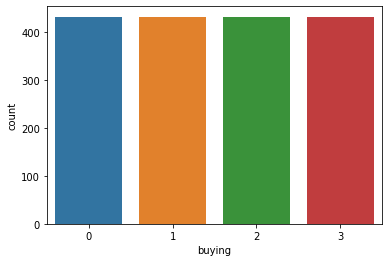

In [13]:
sns.countplot(data = df, x="buying")
vhigh,high,med,low = df["buying"].value_counts()
print("Very High:",vhigh)
print("High:",high)
print("Medium:",med)
print("Low:",low)
plt.show()

Very High: 432
High: 432
Medium: 432
Low: 431


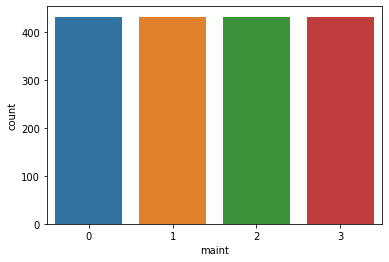

In [14]:
sns.countplot(data = df, x="maint")
vhigh,high,med,low = df["maint"].value_counts()
print("Very High:",vhigh)
print("High:",high)
print("Medium:",med)
print("Low:",low)
plt.show()

In [15]:
df["buying"].unique()

array([3, 0, 2, 1])

In [16]:
df["maint"].unique()

array([3, 0, 2, 1])

In [17]:
x = df.drop("Class", axis=1)
y = df["Class"]

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [20]:
base_pred = model.predict(xtest)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Accuracy: ",accuracy_score(ytest, base_pred))

Accuracy:  0.9826589595375722


In [22]:
print("Confusion Matrix:\n", confusion_matrix(ytest, base_pred))

Confusion Matrix:
 [[ 75   1   1   0]
 [  2  13   1   0]
 [  1   0 239   0]
 [  0   0   0  13]]


c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


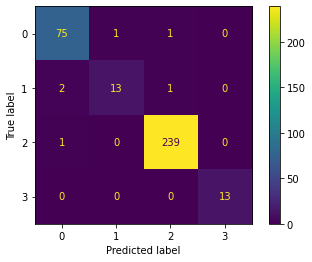

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, xtest, ytest)
plt.show()

In [24]:
print("Classification Report:\n", classification_report(ytest, base_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.93      0.81      0.87        16
           2       0.99      1.00      0.99       240
           3       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



In [25]:
pd.DataFrame(index=x.columns, data=model.feature_importances_, columns=["Feature Importances"])

,Feature Importances
buying,0.217742
maint,0.172513
doors,0.068449
persons,0.201285
lug_boot,0.088696
safety,0.251317


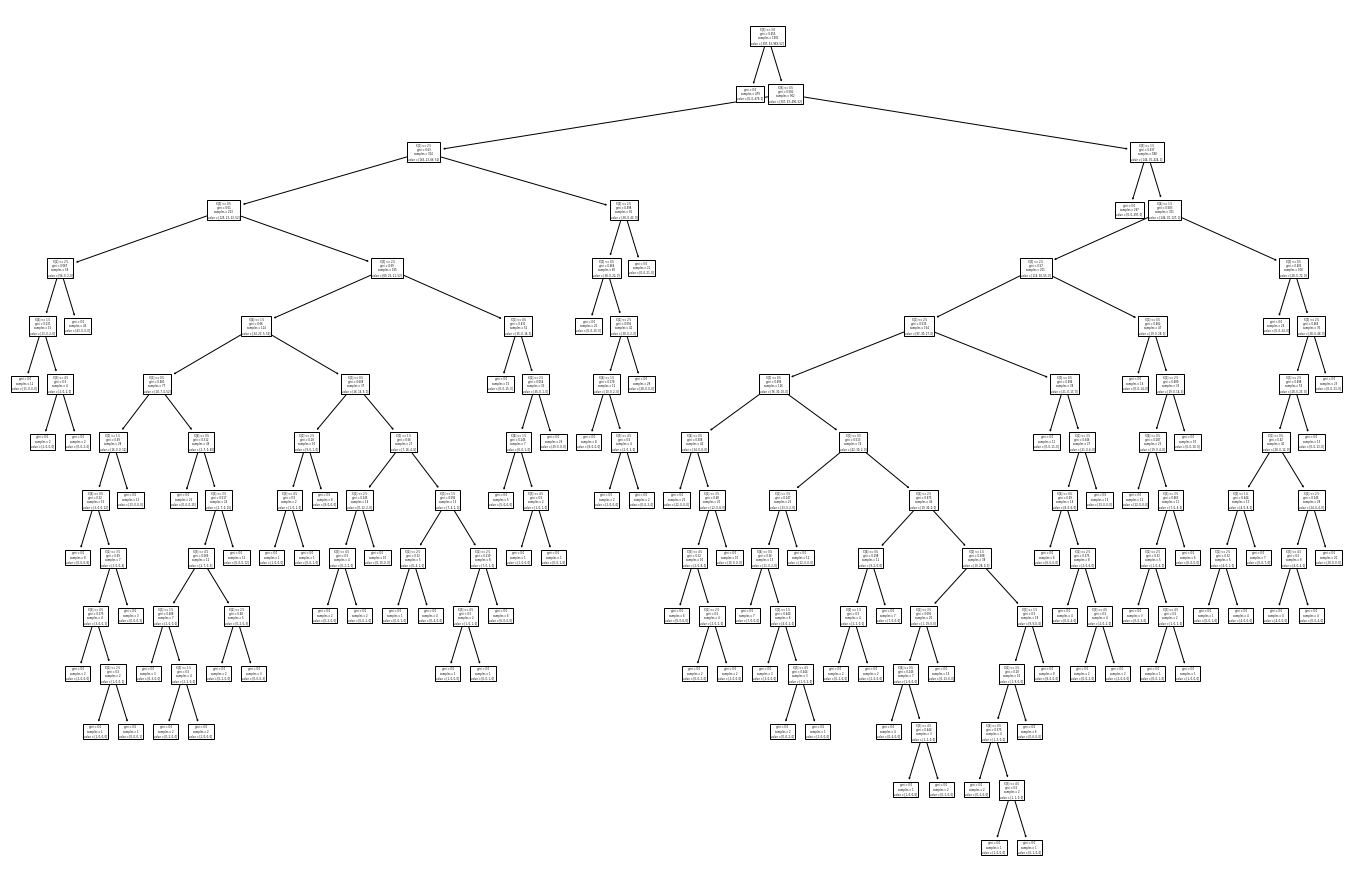

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,16))
plot_tree(model)
plt.show()